## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [2]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [4]:
symbols = ["MSFT", "AMZN", "AAPL", "GOOG", "FB"]
start_date = "2019-01-01"
end_date = "2019-07-01"
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [5]:
stock_data

Attributes  Adj Close                                               \
Symbols          MSFT       AMZN       AAPL       GOOG          FB   
Date                                                                 
2019-01-02  97.353897  76.956497  38.168346  52.292500         NaN   
2019-01-03  93.772461  75.014000  34.366505  50.803001         NaN   
2019-01-04  98.133736  78.769501  35.833584  53.535500         NaN   
2019-01-07  98.258904  81.475502  35.753822  53.419498         NaN   
2019-01-08  98.971336  82.829002  36.435402  53.813999         NaN   
...               ...        ...        ...        ...         ...   
2022-08-04        NaN        NaN        NaN        NaN  170.570007   
2022-08-05        NaN        NaN        NaN        NaN  167.110001   
2022-08-08        NaN        NaN        NaN        NaN  170.250000   
2022-08-09        NaN        NaN        NaN        NaN  168.529999   
2022-08-10        NaN        NaN        NaN        NaN  177.949997   

Attributes       Close                                               ...  \
Symbols           MSFT       AMZN       AAPL       GOOG          FB  ...   
Date                                                                 ...   
2019-01-02  101.120003  76.956497  39.480000  52.292500         NaN  ...   
2019-01-03   97.400002  75.014000  35.547501  50.803001         NaN  ...   
2019-01-04  101.930000  78.769501  37.064999  53.535500         NaN  ...   
2019-01-07  102.059998  81.475502  36.982498  53.419498         NaN  ...   
2019-01-08  102.800003  82.829002  37.687500  53.813999         NaN  ...   
...                ...        ...        ...        ...         ...  ...   
2022-08-04         NaN        NaN        NaN        NaN  170.570007  ...   
2022-08-05         NaN        NaN        NaN        NaN  167.110001  ...   
2022-08-08         NaN        NaN        NaN        NaN  170.250000  ...   
2022-08-09         NaN        NaN        NaN        NaN  168.529999  ...   
2022-08-10         NaN        NaN        NaN        NaN  177.949997  ...   

Attributes        Open                                               \
Symbols           MSFT       AMZN       AAPL       GOOG          FB   
Date                                                                  
2019-01-02   99.550003  73.260002  38.722500  50.828499         NaN   
2019-01-03  100.099998  76.000504  35.994999  52.049999         NaN   
2019-01-04   99.720001  76.500000  36.132500  51.629501         NaN   
2019-01-07  101.639999  80.115501  37.174999  53.575001         NaN   
2019-01-08  103.040001  83.234497  37.389999  53.805500         NaN   
...                ...        ...        ...        ...         ...   
2022-08-04         NaN        NaN        NaN        NaN  168.300003   
2022-08-05         NaN        NaN        NaN        NaN  166.990005   
2022-08-08         NaN        NaN        NaN        NaN  168.000000   
2022-08-09         NaN        NaN        NaN        NaN  168.949997   
2022-08-10         NaN        NaN        NaN        NaN  175.990005   

Attributes      Volume                                                    
Symbols           MSFT         AMZN         AAPL        GOOG          FB  
Date                                                                      
2019-01-02  35329300.0  159662000.0  148158800.0  30652000.0         NaN  
2019-01-03  42579100.0  139512000.0  365248800.0  36822000.0         NaN  
2019-01-04  44060600.0  183652000.0  234428400.0  41878000.0         NaN  
2019-01-07  35656100.0  159864000.0  219111200.0  39638000.0         NaN  
2019-01-08  31514400.0  177628000.0  164101200.0  35298000.0         NaN  
...                ...          ...          ...         ...         ...  
2022-08-04         NaN          NaN          NaN         NaN  23938200.0  
2022-08-05         NaN          NaN          NaN         NaN  25816700.0  
2022-08-08         NaN          NaN          NaN         NaN  27299100.0  
2022-08-09         NaN          NaN          NaN         Na

In [6]:
stock_data['Adj Close']

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Date,,,,,
2019-01-02,97.353897,76.956497,38.168346,52.292500,NaN
2019-01-03,93.772461,75.014000,34.366505,50.803001,NaN
2019-01-04,98.133736,78.769501,35.833584,53.535500,NaN
2019-01-07,98.258904,81.475502,35.753822,53.419498,NaN
2019-01-08,98.971336,82.829002,36.435402,53.813999,NaN
...,...,...,...,...,...
2022-08-04,NaN,NaN,NaN,NaN,170.570007
2022-08-05,NaN,NaN,NaN,NaN,167.110001
2022-08-08,NaN,NaN,NaN,NaN,170.250000


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

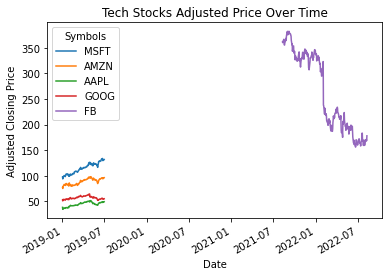

In [7]:
stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Tech Stocks Adjusted Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

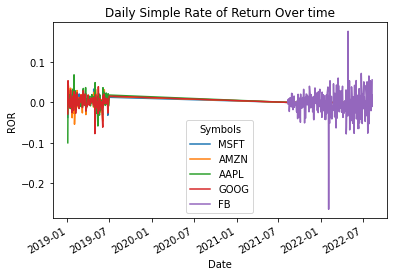

<Figure size 1152x648 with 0 Axes>

In [8]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

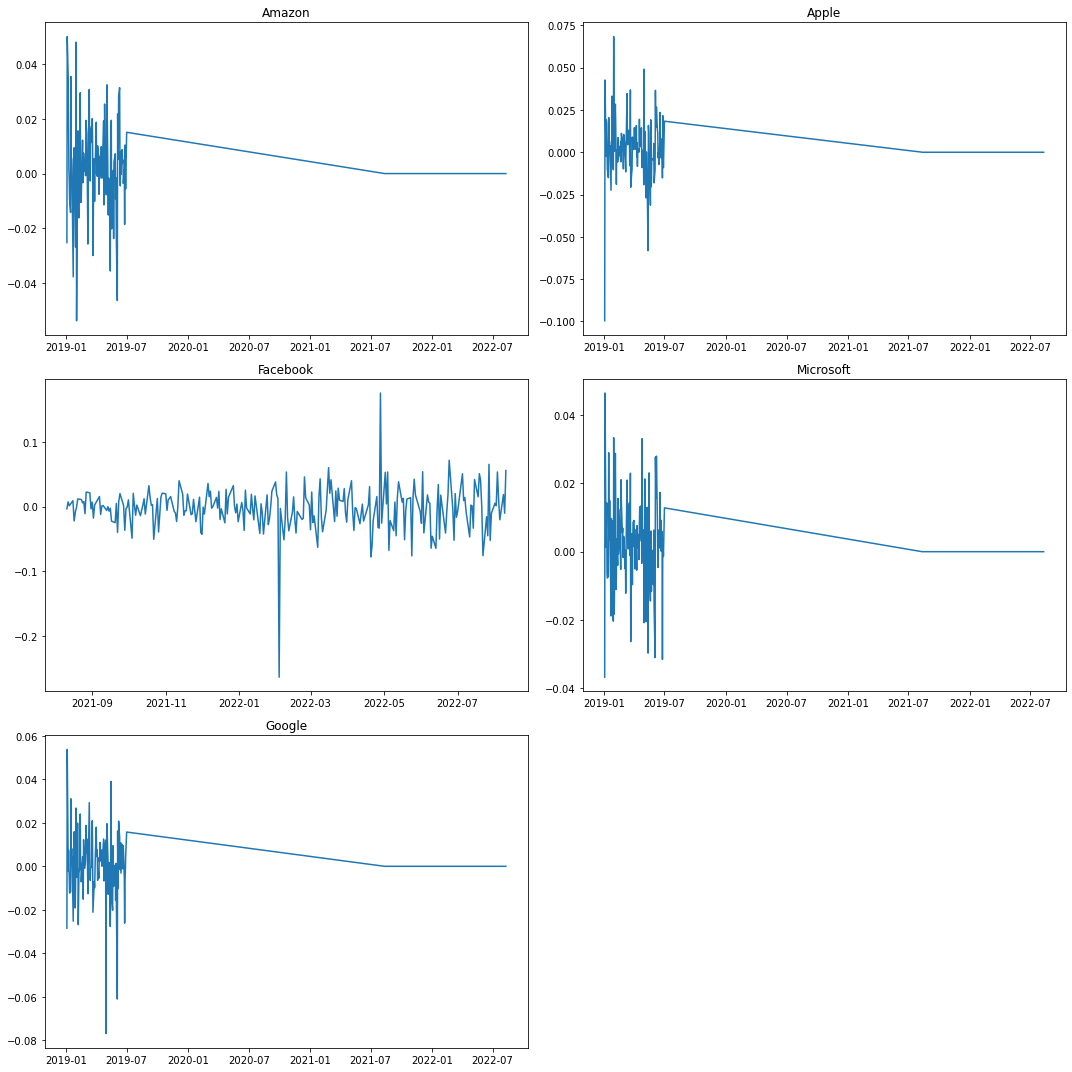

In [9]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Adj Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Adj Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Adj Close']['FB'].pct_change())
ax3.set_title("Facebook")
ax4.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Adj Close']['GOOG'].pct_change())
ax5.set_title("Google")
plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately. 
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [10]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()

daily_mean

Symbols
MSFT    0.000833
AMZN    0.000636
AAPL    0.000726
GOOG    0.000172
FB     -0.002205
dtype: float64

In [11]:
# daily mean index for the x axis
daily_mean.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [12]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[0.0008329267300908207,
 0.0006358015367367365,
 0.000726238383580951,
 0.0001715449189031611,
 -0.0022052064226829276]

In [13]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

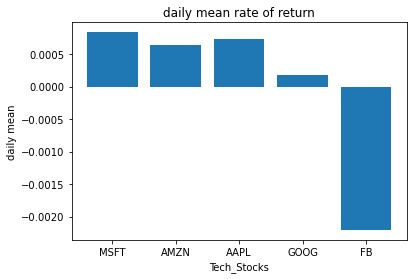

In [14]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.show()

Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately. 
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [15]:
# calculate variance
daily_var = stock_data_daily_returns.var()
daily_var

Symbols
MSFT    0.000064
AMZN    0.000093
AAPL    0.000114
GOOG    0.000085
FB      0.001152
dtype: float64

In [16]:
# variance index for the x axis
daily_var.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [17]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[6.373951638466442e-05,
 9.251498305085139e-05,
 0.00011395699700151126,
 8.451763547166302e-05,
 0.0011517968196412198]

In [18]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4])

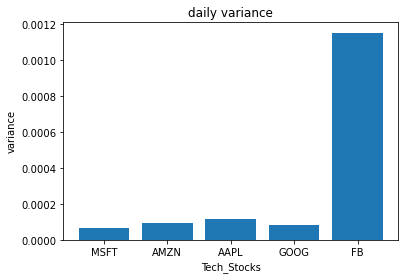

In [19]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately. 

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [20]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

Symbols
MSFT    0.007984
AMZN    0.009618
AAPL    0.010675
GOOG    0.009193
FB      0.033938
dtype: float64

In [21]:
# standard deviation index for the x axis
daily_var.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [22]:
# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[0.007983703174884723,
 0.009618470931018683,
 0.010675064262172441,
 0.009193347348581094,
 0.03393813223560218]

In [23]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1, 2, 3, 4])

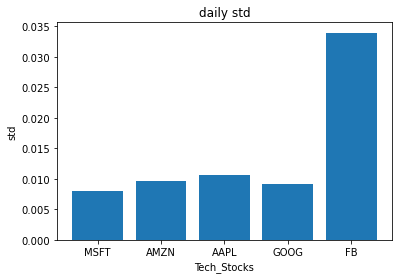

In [24]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.show()

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [25]:
stock_data_daily_returns.corr()

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Symbols,,,,,
MSFT,1.000000,0.734171,0.657089,0.633614,NaN
AMZN,0.734171,1.000000,0.613694,0.720540,NaN
AAPL,0.657089,0.613694,1.000000,0.569464,NaN
GOOG,0.633614,0.720540,0.569464,1.000000,NaN
FB,NaN,NaN,NaN,NaN,1.0


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.